# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
import json
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [100]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [101]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"appid="+weather_api_key+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | uncia
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | inongo
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | aflu
City not found. Skipping...
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | yashkul
Processing Record 11 of Set 1 | srednekolymsk
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | los llanos de aridane
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | christchurch
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | geraldton
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | ilhabela
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing

In [102]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [103]:
# Display sample data
def K_to_C(x): 
    return x-253.15

city_data_df["Max Temp"]=city_data_df["Max Temp"].apply(K_to_C)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,uncia,-18.4670,-66.5685,33.60,31,35,2.96,BO,1667850832
1,rikitea,-23.1203,-134.9692,42.65,92,100,10.90,PF,1667850833
2,kavieng,-2.5744,150.7967,47.54,77,84,2.85,PG,1667850833
3,inongo,-1.9500,18.2667,42.42,91,58,1.36,CD,1667850833
4,cabo san lucas,22.8909,-109.9124,49.23,62,5,4.46,MX,1667850834


In [104]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [105]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uncia,-18.4670,-66.5685,33.60,31,35,2.96,BO,1667850832
1,rikitea,-23.1203,-134.9692,42.65,92,100,10.90,PF,1667850833
2,kavieng,-2.5744,150.7967,47.54,77,84,2.85,PG,1667850833
3,inongo,-1.9500,18.2667,42.42,91,58,1.36,CD,1667850833
4,cabo san lucas,22.8909,-109.9124,49.23,62,5,4.46,MX,1667850834


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

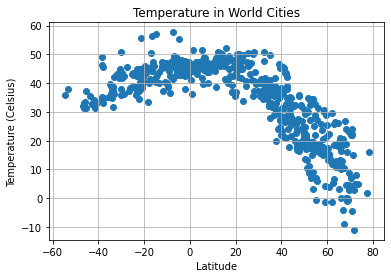

In [106]:
# Build scatter plot for latitude vs. temperature
x=city_data_df["Lat"]
y=city_data_df["Max Temp"]
plt.scatter(x,y)


# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

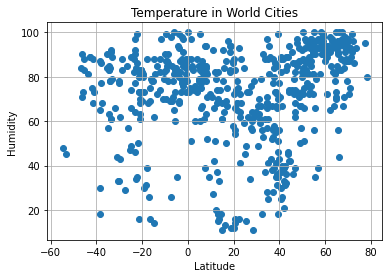

In [107]:
# Build the scatter plots for latitude vs. humidity
x=city_data_df["Lat"]
y=city_data_df["Humidity"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

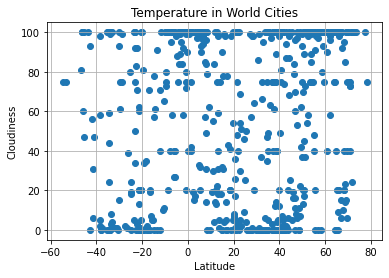

In [108]:
# Build the scatter plots for latitude vs. cloudiness
x=city_data_df["Lat"]
y=city_data_df["Cloudiness"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

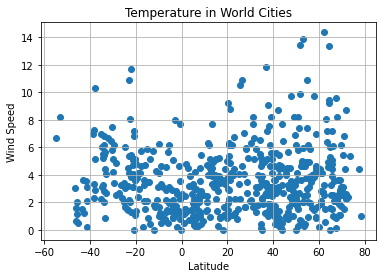

In [109]:
# Build the scatter plots for latitude vs. wind speed
x=city_data_df["Lat"]
y=city_data_df["Wind Speed"]
plt.scatter(x,y)

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [118]:
# Define a function to create Linear Regression plots
def create_linregress_plot(x, y, x_str, y_str):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = (x * slope + intercept)
    correlation = pearsonr(x,y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
    # Incorporate the other graph properties
    plt.scatter(x, y, facecolors='blue', alpha=1.0)
    plt.plot(x, regress_values, "r-")
    plt.xlabel(x_str)
    plt.ylabel(y_str)
    plt.legend([line_eq], labelcolor="r")
    plt.savefig(f"output_data/{x_str}_vs_{y_str}.png")
    print(f"The r=value is {rvalue**2}")
    plt.show()

In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hem_df=city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,cabo san lucas,22.8909,-109.9124,49.23,62,5,4.46,MX,1667850834
7,portland,45.5234,-122.6762,26.32,91,100,4.02,US,1667850677
8,yashkul,46.1711,45.3435,22.79,72,79,4.50,RU,1667850835
9,srednekolymsk,67.4500,153.6833,-8.94,100,92,0.11,RU,1667850835
10,tasiilaq,65.6145,-37.6368,19.80,90,100,4.41,GL,1667850836


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hem_df=city_data_df[city_data_df["Lat"] <0]

# Display sample data
southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uncia,-18.4670,-66.5685,33.60,31,35,2.96,BO,1667850832
1,rikitea,-23.1203,-134.9692,42.65,92,100,10.90,PF,1667850833
2,kavieng,-2.5744,150.7967,47.54,77,84,2.85,PG,1667850833
3,inongo,-1.9500,18.2667,42.42,91,58,1.36,CD,1667850833
5,atuona,-9.8000,-139.0333,44.89,70,73,6.26,PF,1667850834


###  Temperature vs. Latitude Linear Regression Plot

The r=value is 0.7440621269353772


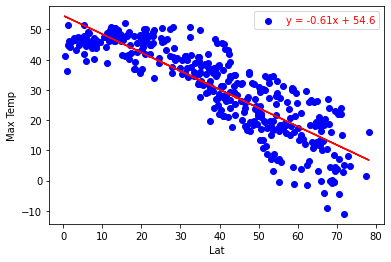

In [124]:
# Linear regression on Northern Hemisphere

lat_n=northern_hem_df["Lat"]
lat_s=southern_hem_df["Lat"]
temp_n=northern_hem_df["Max Temp"]
temp_s=southern_hem_df["Max Temp"]
humid_n=northern_hem_df["Humidity"]
humid_s=southern_hem_df["Humidity"]
wind_n=northern_hem_df["Wind Speed"]
wind_s=southern_hem_df["Wind Speed"]
cloudiness_n=northern_hem_df["Cloudiness"]
cloudiness_s=southern_hem_df["Cloudiness"]

create_linregress_plot(lat_n, temp_n, "Lat", "Max Temp")
plt.show()

The r=value is 0.41591049639865585


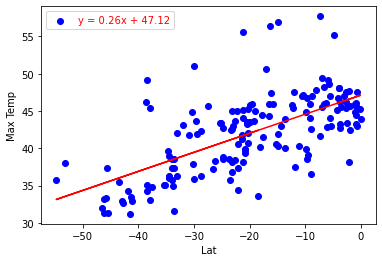

In [125]:
# Linear regression on Southern Hemisphere
create_linregress_plot(lat_s, temp_s, "Lat", "Max Temp")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r=value is 0.11096066371493586


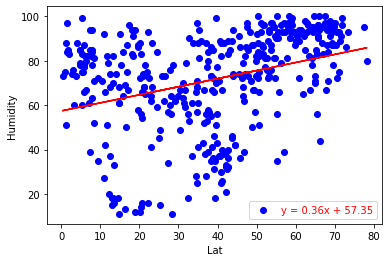

In [126]:
# Northern Hemisphere
create_linregress_plot(lat_n, humid_n, "Lat", "Humidity")
plt.show()

The r=value is 0.030210188789302178


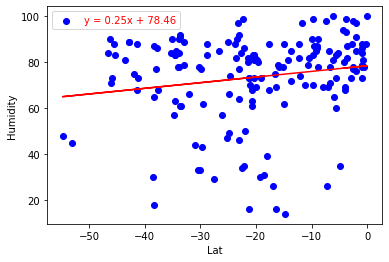

In [127]:
# Southern Hemisphere
create_linregress_plot(lat_s, humid_s, "Lat", "Humidity")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r=value is 0.03184024803786378


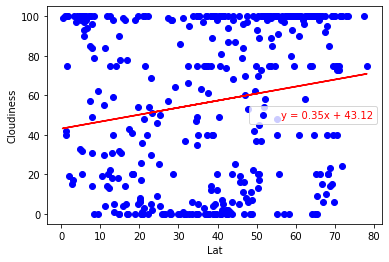

In [128]:
# Northern Hemisphere
create_linregress_plot(lat_n, cloudiness_n, "Lat", "Cloudiness")
plt.show()

The r=value is 0.07170508479311705


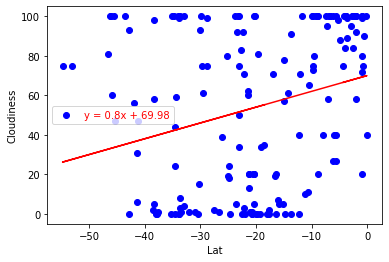

In [129]:
# Southern Hemisphere
create_linregress_plot(lat_s, cloudiness_s, "Lat", "Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r=value is 0.024624149497559256


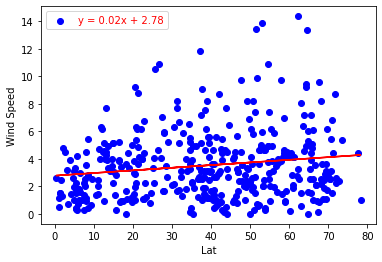

In [130]:
# Northern Hemisphere
create_linregress_plot(lat_n, wind_n, "Lat", "Wind Speed")
plt.show()

The r=value is 0.07385233173381876


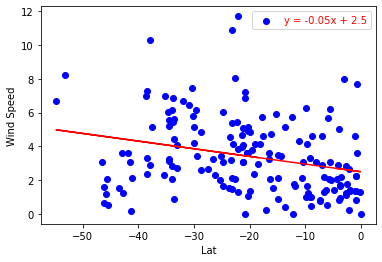

In [131]:
# Southern Hemisphere
create_linregress_plot(lat_s, wind_s, "Lat", "Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#It seems to me that the Northern Hemisphere has more activity in the charts than that of the Southern Hemisphere.